In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt


# Load the dataset
heart_df = pd.read_csv('heart.csv')

# Define the categorical and numerical columns
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Separate features and target
X = heart_df.drop('HeartDisease', axis=1)
y = heart_df['HeartDisease']

# Apply the preprocessing pipeline to the features
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

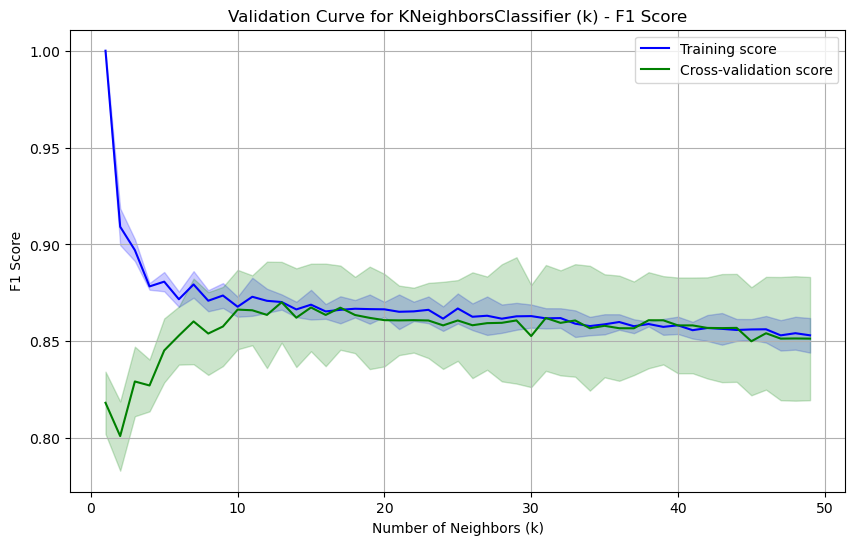

In [35]:
# Define the range for k
k_range = range(1, 50)

# Create a scorer for F1 Score
f1_scorer = make_scorer(f1_score, average='weighted')

# Validation curve for k
train_scores, valid_scores = validation_curve(
    KNeighborsClassifier(),
    X_train, y_train,
    param_name='n_neighbors',
    param_range=k_range,
    cv=5,
    scoring=f1_scorer,
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_mean, label='Training score', color='blue')
plt.plot(k_range, valid_mean, label='Cross-validation score', color='green')
plt.fill_between(k_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(k_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='green')
plt.title('Validation Curve for KNeighborsClassifier (k) - F1 Score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

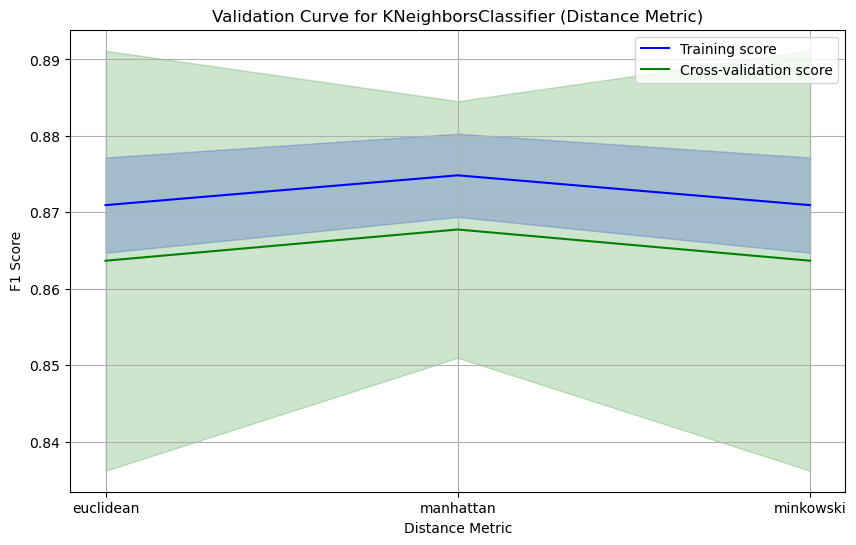

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

# Define the range for distance metrics
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

# Create a scorer for F1 Score
f1_scorer = make_scorer(f1_score, average='weighted')

# Validation curve for distance metrics
train_scores, valid_scores = validation_curve(
    KNeighborsClassifier(n_neighbors=12),
    X_train, y_train,
    param_name='metric',
    param_range=distance_metrics,
    cv=5,
    scoring=f1_scorer,
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(distance_metrics, train_mean, label='Training score', color='blue')
plt.plot(distance_metrics, valid_mean, label='Cross-validation score', color='green')
plt.fill_between(distance_metrics, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(distance_metrics, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='green')
plt.title('Validation Curve for KNeighborsClassifier (Distance Metric)')
plt.xlabel('Distance Metric')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


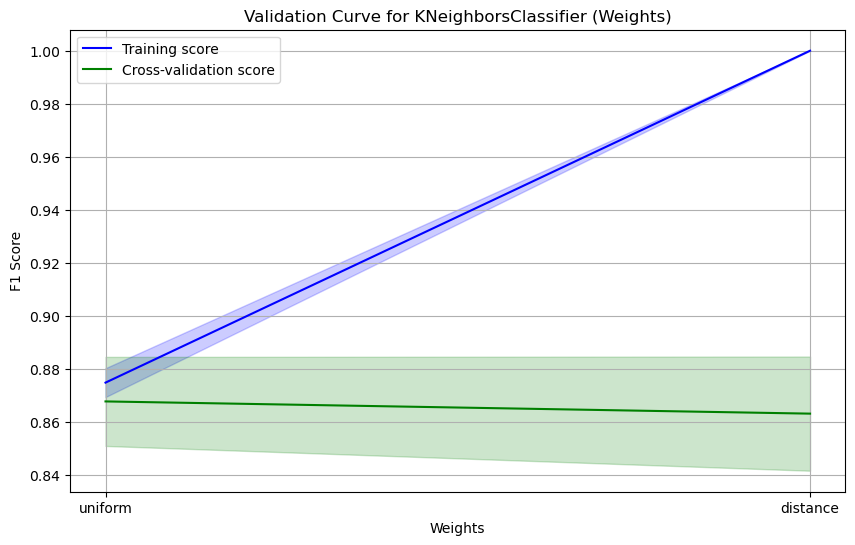

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

# Define the range for weights
weights_options = ['uniform', 'distance']

# Create a scorer for F1 Score
f1_scorer = make_scorer(f1_score, average='weighted')

# Validation curve for weights
train_scores, valid_scores = validation_curve(
    KNeighborsClassifier(n_neighbors=12, metric='manhattan'),
    X_train, y_train,
    param_name='weights',
    param_range=weights_options,
    cv=5,
    scoring=f1_scorer,
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(weights_options, train_mean, label='Training score', color='blue')
plt.plot(weights_options, valid_mean, label='Cross-validation score', color='green')
plt.fill_between(weights_options, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(weights_options, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='green')
plt.title('Validation Curve for KNeighborsClassifier (Weights)')
plt.xlabel('Weights')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


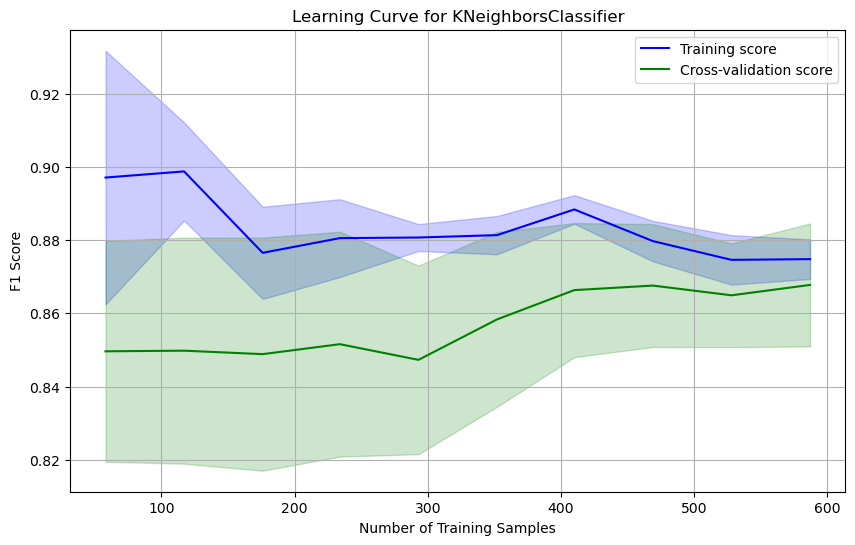

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score

# Define the final KNN model with the chosen hyperparameters
final_knn = KNeighborsClassifier(n_neighbors=12, metric='manhattan', weights='uniform')

# Create a scorer for F1 Score
f1_scorer = make_scorer(f1_score, average='weighted')

# Generate learning curve data
train_sizes, train_scores, valid_scores = learning_curve(
    final_knn, X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring=f1_scorer,
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, valid_mean, label='Cross-validation score', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='green')
plt.title('Learning Curve for KNeighborsClassifier')
plt.xlabel('Number of Training Samples')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Test set F1 score:  0.9131368348987859


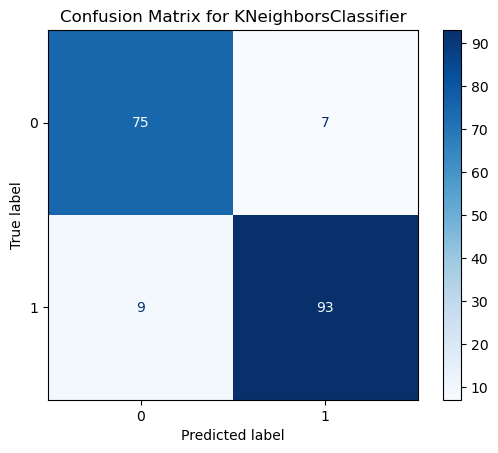

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Define the final KNN model with the chosen hyperparameters
final_knn = KNeighborsClassifier(n_neighbors=12, metric='manhattan', weights='uniform')

# Fit the model on the training data
final_knn.fit(X_train, y_train)

# Predict on the test set
y_pred = final_knn.predict(X_test)

# Calculate the F1 score on the test set
test_f1 = f1_score(y_test, y_pred, average='weighted')
print("Test set F1 score: ", test_f1)

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNeighborsClassifier')
plt.show()


In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Define the parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 100),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Initialize the GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit the model with GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 42, 'weights': 'distance'}


Test set F1 score:  0.9130434782608695


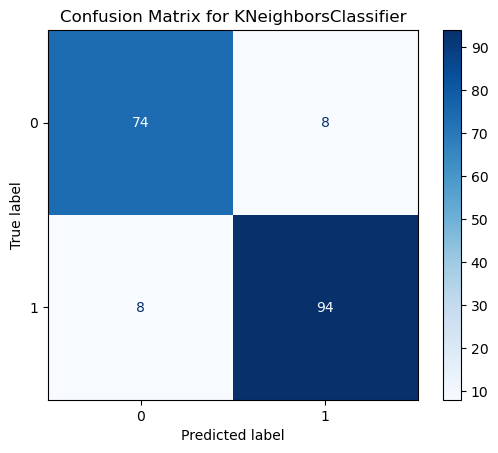

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Define the final KNN model with the chosen hyperparameters
final_knn = KNeighborsClassifier(n_neighbors=42, metric='manhattan', weights='uniform')

# Fit the model on the training data
final_knn.fit(X_train, y_train)

# Predict on the test set
y_pred = final_knn.predict(X_test)

# Calculate the F1 score on the test set
test_f1 = f1_score(y_test, y_pred, average='weighted')
print("Test set F1 score: ", test_f1)

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNeighborsClassifier')
plt.show()
